# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].str.len()
df.head()

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


In [3]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()[0]

print(f"media: {media}, mediana: {mediana}, moda: {moda}")

media: 15.481103166496425, mediana: 14.0, moda: 12


In [4]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desviacion = df['title_length'].std()

print(f"rango: {rango}, varianza: {varianza}, desviación: {desviacion}")

rango: 67, varianza: 72.1067488840288, desviación: 8.491569282766807


In [5]:
# Calcula asimetría y curtosis de la columna 'title_length'
from scipy import stats

asimetria = stats.skew(df['title_length'])
curtosis = stats.kurtosis(df['title_length'])

print(f"asimetría: {asimetria}, curtosis: {curtosis}")

asimetría: 1.5229143965677572, curtosis: 3.7867237597626007


In [6]:
# Imprime el título más corto y el título más largo según su longitud
titulo_mas_corto = df.loc[df['title_length'].idxmin()]['title']
titulo_mas_largo = df.loc[df['title_length'].idxmax()]['title']

print(f"titulo más corto es: {titulo_mas_corto}")
print(f"título más largo es: {titulo_mas_largo}")

titulo más corto es: M
título más largo es: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


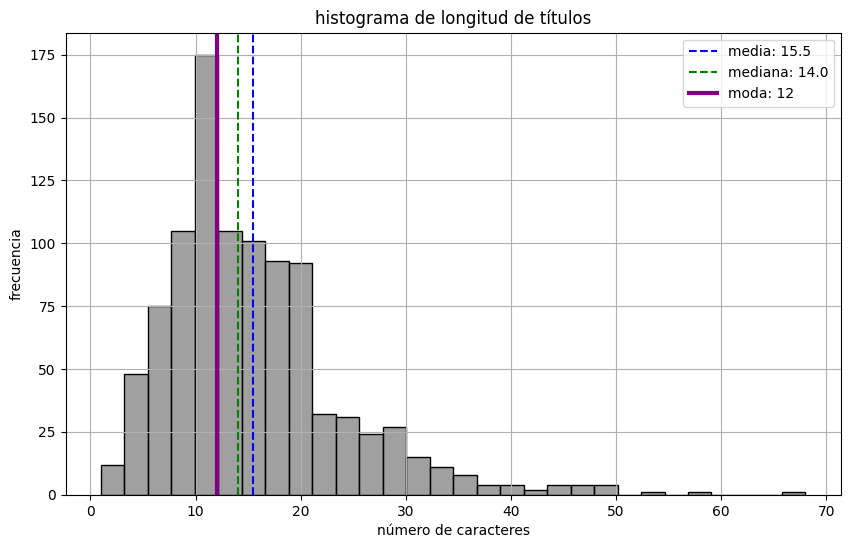

In [7]:
# grafica tus resultados
import seaborn as sns

plt.figure(figsize=(10, 6))
# histograma
sns.histplot(df['title_length'], bins=30, color='gray')
# lineas sobre x 
plt.axvline(media, color='blue', linestyle='--', label=f'media: {media:.1f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'mediana: {mediana}')
plt.axvline(moda, color='purple', linestyle='-', linewidth='3', label=f'moda: {moda}')
plt.title("histograma de longitud de títulos")
plt.xlabel("número de caracteres")
plt.ylabel("frecuencia")
plt.legend()
plt.grid(True)
plt.show()


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [8]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
muestras = df['title'].sample(5)
long_titulo = muestras.str.len().tolist()

print("películas seleccionadas:")
print(muestras.values)
print("longitud titulo:", long_titulo)


películas seleccionadas:
['The Proposition' 'The Iron Giant' "Singin' in the Rain"
 'Good Night, and Good Luck.' 'The Motorcycle Diaries']
longitud titulo: [15, 14, 19, 26, 22]


In [9]:
# Calcula la media de los 5 valores
media = sum(long_titulo) / len(long_titulo)
print(f"media: {media:.2f}")

media: 19.20


In [10]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_cuadrado = [(x - media) ** 2 for x in long_titulo]
print("diferencias al cuadrado:", diferencias_cuadrado)


diferencias al cuadrado: [17.639999999999993, 27.039999999999992, 0.039999999999999716, 46.24000000000001, 7.840000000000004]


In [11]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza = sum(diferencias_cuadrado) / len(long_titulo)
desviacion_estandar = varianza ** 0.5

print(f"varianza: {varianza:.2f}")
print(f"desviación estándar: {desviacion_estandar:.2f}")


varianza: 19.76
desviación estándar: 4.45
